# 🚗📈 Plan d’Analyse pour ton projet Tesla

---

## 1. 🗂️ Prise en main des données

- **Afficher les premières lignes, vérifier les types de variables**
- **Nettoyage de base** (valeurs manquantes, doublons, formats)

---

## 2. 🔎 Analyse exploratoire (EDA)

- **Statistiques descriptives** (moyenne, min, max, etc.)
- **Visualisation rapide** des tendances (courbe du prix de clôture, volume, etc.)

---

## 3. 💡 Questions business / Hypothèses

**Exemples :**
- Comment a évolué le cours de Tesla sur la période ?
- Y a-t-il une corrélation entre volume échangé et volatilité ?
- Identifier les plus fortes hausses/baisse, ou périodes intéressantes

---

## 4. 📊 Visualisation avancée

- Courbe d’évolution
- Histogrammes
- Boxplots
- Heatmap de corrélation

---

## 5. 📝 Insights clés & synthèse

- Ce que tu retiens, axes d’analyse complémentaires, prochaines étapes

---




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Tesla_stock_data.csv' , )

In [ ]:
print(df.head())

In [ ]:
# Affichage des informations sur le DataFrame
print(df.info())

In [ ]:
#verification des valeurs manquantes
print(df.isnull().sum())

In [ ]:
#addicher les statistiques descriptives
print(df.describe())

In [ ]:
#verifier les doublons
print(df.duplicated().sum())

In [ ]:
#optionnel : convversion de la colonne 'Date' en datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

## ✅ Étapes réalisées jusqu’ici

- ✔️ **Vérification des doublons**
- ✔️ **Conversion de la colonne `Date` au format datetime**
- ✔️ **Analyse des types de variables**
- ✔️ **Vérification des valeurs manquantes**
- ✔️ **Calcul des statistiques descriptives (moyenne, min, max, etc.)**



# 🚀 Analyse avancée des données Tesla

Dans cette section, nous allons approfondir notre analyse à l’aide de techniques et visualisations utilisées par les Data Analysts professionnels. Objectif : mieux comprendre les tendances, la volatilité et les relations entre variables pour en tirer des insights business concrets.

---

## 🟢 Techniques avancées utilisées

- **Moyenne mobile (Rolling Mean)** : pour lisser la courbe et détecter les tendances de fond.
- **Boxplot (Boîte à moustaches)** : pour analyser la volatilité et la dispersion des prix selon les périodes.
- **Heatmap de corrélation** : pour identifier les liens entre les différentes variables financières.
- **Détection de journées exceptionnelles** : pour repérer les plus fortes variations à la hausse ou à la baisse.
- **Synthèse business** : pour résumer les points clés et proposer des pistes d’interprétation.

---

Ces analyses te permettront de :

- Illustrer ta capacité à manipuler et visualiser des données financières.
- Fournir des insights exploitables, attendus en entreprise ou en entretien.
- Rendre ton projet attractif pour un portfolio ou un recruteur.

---



## 📈 Analyse de la tendance : Moyenne mobile (Rolling Mean)

La moyenne mobile permet de lisser la série temporelle et de mieux visualiser la tendance de fond du prix de clôture de Tesla.  
C’est une technique très utilisée en finance et data analyse pour éviter d’interpréter les fluctuations “bruit” à court terme.

Nous allons tracer :
- La courbe du prix de clôture
- La courbe de la moyenne mobile sur 30 jours


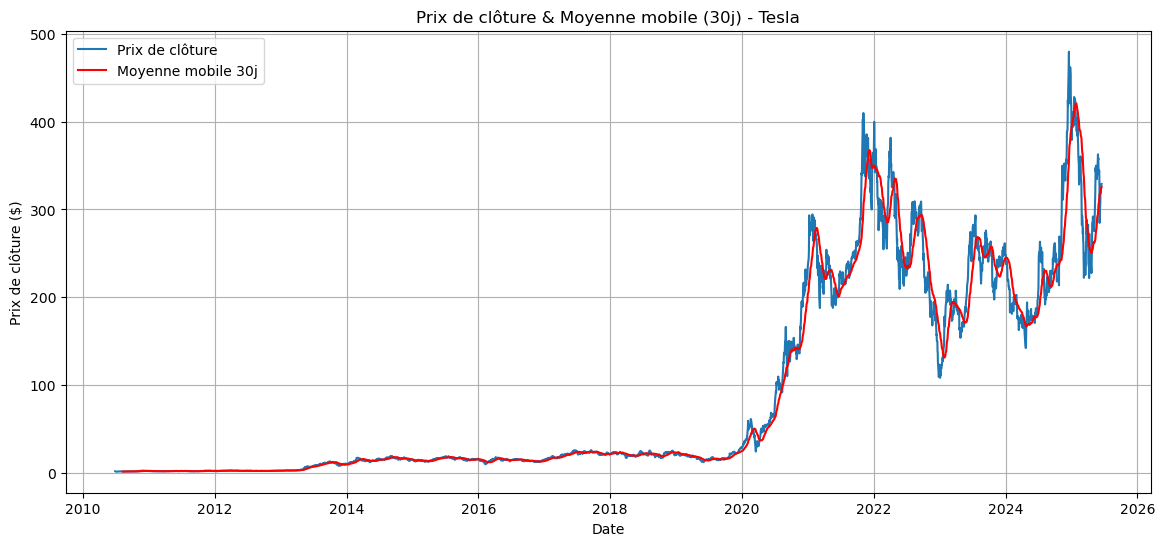

In [20]:
# Calcule une moyenne mobile sur 30 jours du prix de clôture
df['Close_rolling_30'] = df['Close'].rolling(window=30).mean()

# Crée une nouvelle figure
plt.figure(figsize=(14, 6))

# Affiche la courbe du prix de clôture
plt.plot(df['Date'], df['Close'], label='Prix de clôture')

# Affiche la courbe de la moyenne mobile 30 jours (en rouge)
plt.plot(df['Date'], df['Close_rolling_30'], label='Moyenne mobile 30j', color='red')

# Ajoute un titre, labels, légende et grille
plt.title("Prix de clôture & Moyenne mobile (30j) - Tesla")
plt.xlabel("Date")
plt.ylabel("Prix de clôture ($)")
plt.legend()
plt.grid(True)

# Affiche le graphique
plt.show()



## 📦 Analyse de la volatilité : Boxplot mensuel

Le boxplot (ou boîte à moustaches) permet de visualiser la distribution et la volatilité du prix de clôture sur chaque mois.  
On peut rapidement repérer les mois où les prix étaient très dispersés (forte volatilité) ou plus stables.

Chaque “boîte” représente :
- Les 50% des valeurs centrales (le corps de la boîte)
- Les valeurs extrêmes (les “moustaches”)
- Les outliers (points isolés)

Regarde s’il y a des mois avec des prix très étalés ou des hausses/baisse exceptionnelles.


<Figure size 1500x600 with 0 Axes>

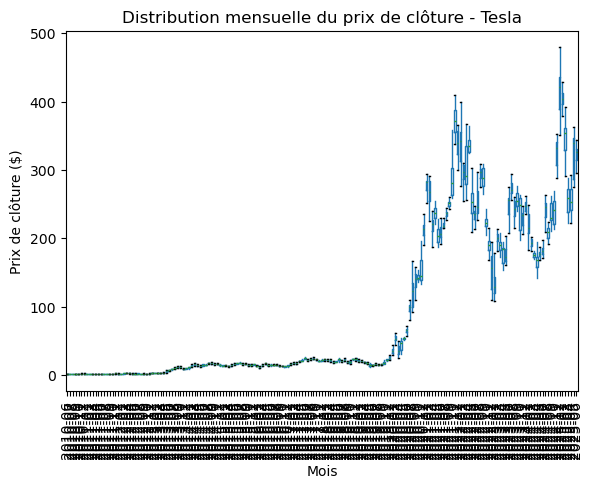

In [21]:
# Ajoute une colonne 'YearMonth' pour grouper par mois
df['YearMonth'] = df['Date'].dt.to_period('M')

# Crée une figure large pour bien voir les mois
plt.figure(figsize=(15, 6))

# Affiche le boxplot : un pour chaque mois (sans afficher les outliers pour plus de lisibilité)
df.boxplot(column='Close', by='YearMonth', grid=False, showfliers=False, rot=90)

# Titre principal
plt.title("Distribution mensuelle du prix de clôture - Tesla")
# Supprime le sous-titre automatique qui gêne la lisibilité
plt.suptitle("")

# Labels des axes
plt.xlabel("Mois")
plt.ylabel("Prix de clôture ($)")

# Affiche le graphique
plt.show()


## 🔥 Analyse des relations entre variables : Heatmap de corrélation

La heatmap (carte de chaleur) met en évidence les corrélations entre les différentes variables numériques du jeu de données Tesla.  
Plus la corrélation est forte (positive ou négative), plus deux variables évoluent ensemble ou à l’inverse l’une de l’autre.

Cela permet de :
- Détecter les variables fortement liées (ex : High et Close)
- Vérifier s’il existe un lien entre volume échangé et variation de prix
- Repérer des axes d’analyse pour aller plus loin

Astuce : une corrélation proche de 1 (rouge) ou -1 (bleu) = lien fort ; proche de 0 = pas de lien.


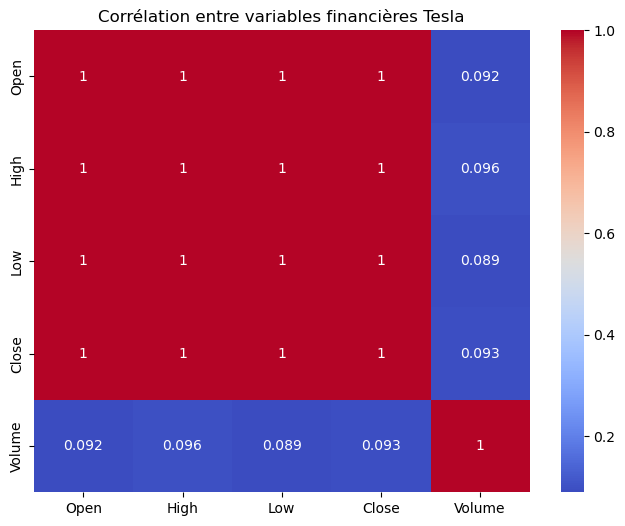

In [22]:
# Import de seaborn pour les visualisations avancées
import seaborn as sns

# Calcule la matrice de corrélation sur les colonnes principales
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Crée une figure de taille moyenne
plt.figure(figsize=(8, 6))

# Affiche la heatmap annotée
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Titre du graphique
plt.title("Corrélation entre variables financières Tesla")

# Affiche le graphique
plt.show()


# 🔎 Entraînement à la recherche et manipulation de données avec Pandas

Dans cette section, l’objectif est de maîtriser la manipulation et l’extraction de données directement avec Pandas, sans passer par le SQL.  
Cette compétence est essentielle pour :

- Automatiser l’analyse en Python pur
- Passer des entretiens techniques (questions fréquentes)
- Être opérationnel sur tout type de fichier (CSV, Excel, etc.)
- Construire rapidement des analyses ou dashboards sans base SQL

---

## 📋 Exemples de recherches possibles avec Pandas

- Filtrer des lignes selon des conditions (valeurs numériques, dates…)
- Extraire un sous-ensemble de colonnes ou de dates
- Grouper et agréger (par mois, année, etc.)
- Chercher des valeurs maximales, minimales, ou des occurrences précises
- Trier, classer, faire des “top N”
- Combiner plusieurs critères (AND/OR) dans une requête
- Appliquer des fonctions personnalisées

---

## 🏆 Entraînement et défis

- Je vais réaliser des requêtes/exercices variés :  
  *Exemples :*
    - “Trouver les 5 plus fortes ba
